# Assignment 5
## Data Analysis and Visualization

These assignments are related to visualization with **MathPlotLib** and **Seaborn** libraries.
* [Matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)

In these assignments, you must program some new code to get as an output figure given in assignment.
* Read the related course material before doing the assignments from the
[Topic 5. Visualization](https://ttc8040.pages.labranet.jamk.fi/da_vi_material/lectures/topic5_visualize.nbconvert/).

In [1]:
# Write your information here!
student_name = 'Jaka Cosic Hämäläinen'
student_id = 'AA6111'

## Assignment 05-01. Visualizing Weather Data

Visualize weather data loaded from the [Finnish Meteorological Institute's WFS interface](https://en.ilmatieteenlaitos.fi/download-observations) using a `DataFrame`. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the file `'data/saatiedot.csv'`, considering that ',' is the column separator and '.' is the decimal separator.
* The first column (or index) of the data contains the time in the format **year-month-day hours:minutes:seconds**.
* Create a new `DataFrame` column `'time, s'` indicating the amount of time in seconds from the first measurement onwards.
* Add a new column `'Air temperature, degC'` to the `DataFrame`.
* Print the first five rows of your processed `DataFrame`.

After processing the data, create an x-y plot as follows:
* Use the column `'time, s'` on the horizontal axis and the column `'Air temperature, degC'` on the vertical axis.
* Mark data points with red dots.
* Provide a legend for the red dots, labeled as `'Air temperature'`.
* Use `'time, s'` for the x-axis title and `'Air temperature $^{o}C$'` for the y-axis title.
* Use [TeX syntax](https://en.wikipedia.org/wiki/TeX) to denote the physical unit in the y-axis title.
* Add a grid with a _black dashed line_.

**The final result should look like the following image:**

![h5.1](./img/h5_t1.png)

In [5]:
# TODO: Implementation

import pandas as pd

df = pd.read_csv('data/saatiedot.csv', sep=',', decimal='.')

df['Time'] = pd.to_datetime(df['Unnamed: 0'])

df['time, s'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()

df['Air temperature, degC'] = df['Air temperature, degC']

print(df[['Time', 'time, s', 'Air temperature, degC']].head())

                 Time  time, s  Air temperature, degC
0 2020-11-04 13:20:00      0.0                    6.5
1 2020-11-04 13:30:00    600.0                    6.2
2 2020-11-04 13:40:00   1200.0                    5.7
3 2020-11-04 13:50:00   1800.0                    5.7
4 2020-11-04 14:00:00   2400.0                    5.7


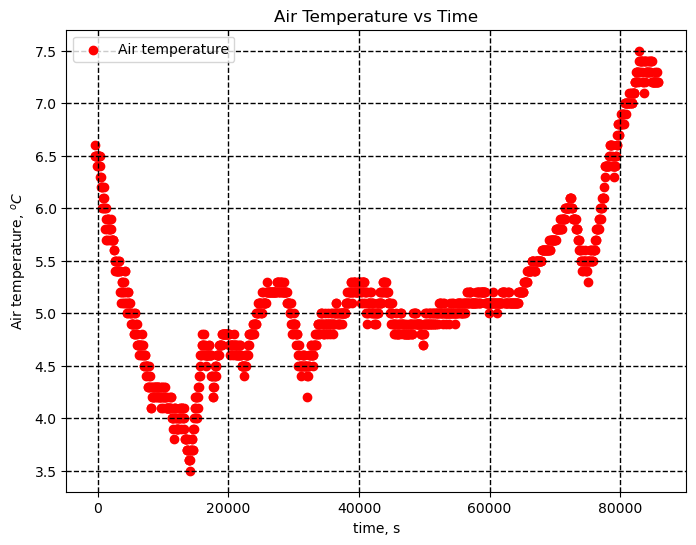

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['time, s'], df['Air temperature, degC'], color='red', label='Air temperature')

plt.xlabel('time, s')
plt.ylabel('Air temperature, $^{o}C$')
plt.title('Air Temperature vs Time')
plt.grid(True, which='both', axis='both', color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()

## Assignment 05-02. Premier League Standings

Visualize selected Premier League football teams' home and away wins in the same bar chart. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the given url address (`"data/england-premier-league-teams-2018-to-2019-stats.csv"`).
* Add new columns `common_name`, `wins_home` (home wins), and `wins_away` (away wins) to the DataFrame.
* Select the following teams from the DataFrame (`common_name` column): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Create a new DataFrame using the `df.melt(id_vars, var_name, value_name ...)` method with new columns `Win Type` and `Wins`
```
   short_name   Win Type  Wins
0     Arsenal  wins_home    14
::::::::::::::::::::::::::::::
7     Arsenal  wins_away     7
```

* After processing the data, create a bar chart on an (x, y)-plane, where the x-axis shows the team's shortened name and the y-axis shows both home wins (`wins_home`) and away wins (`wins_away`).
* Provide a legend for the bars (hint: `Legend`).
* Rotate the x-axis titles by 30 degrees (hint: `xticks`).
* Set a title for the chart.

**The final result should look like the following image:**

![h5.2](./img/h5_t2.png)

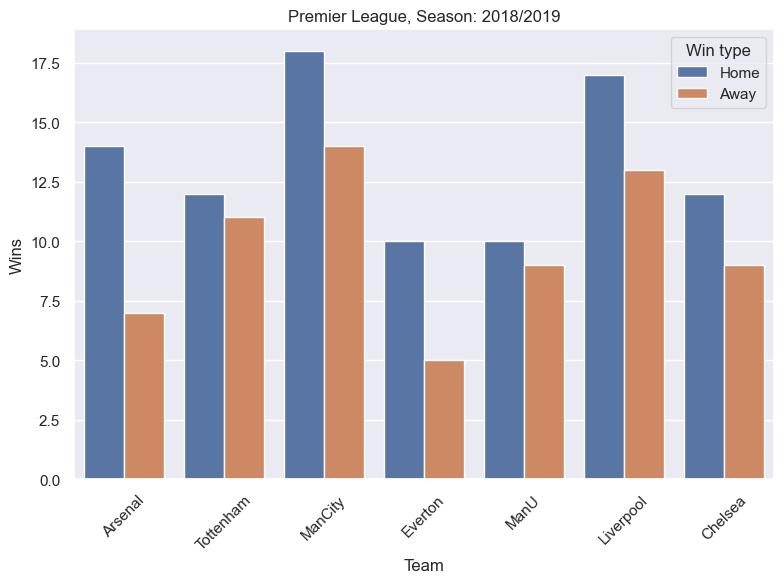

In [27]:
# TODO: Implementation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "data/england-premier-league-teams-2018-to-2019-stats.csv"
df = pd.read_csv(url)

team_names = {
    'Arsenal': 'Arsenal',
    'Tottenham Hotspur': 'Tottenham',
    'Manchester City': 'ManCity',
    'Manchester United': 'ManU',
    'Chelsea': 'Chelsea',
    'Liverpool': 'Liverpool',
    'Everton': 'Everton'
}

df['short_name'] = df['common_name'].map(team_names)

df_filtered = df[df['common_name'].isin(team_names.keys())]
df_filtered = df_filtered[['common_name', 'wins_home', 'wins_away', 'short_name']]

df_melted = df_filtered.melt(id_vars=['common_name', 'short_name'], value_vars=['wins_home', 'wins_away'],
                              var_name='Win type', value_name='wins')
df_melted['Win type'] = df_melted['Win type'].map({'wins_home': 'Home', 'wins_away': 'Away'})


sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x='short_name', y='wins', hue='Win type')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.title('Premier League, Season: 2018/2019')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Assignment 05-03. Premier League Standings

Visualize Premier League football data for selected teams, showing both home and away wins in the same bar chart. Before plotting the data, process it as follows:
* Load the data into a `DataFrame` from the file `"data/england-premier-league-teams-2018-to-2019-stats.csv"`.
* Add columns `team_name, common_name, season, wins, draws`, and `losses` to the `DataFrame`.
* Select the following teams (`common_name`): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Add a completely new column `points` to the `DataFrame` using the formula: `wins * 3 + draws` (0 points for losses).

After processing the data, create a bar chart on a transposed (x, y)-plane, where the y-axis shows the shortened team name, and the x-axis shows the points collected by the team.
* Try to rotate the y-axis titles by _30_ degrees (hint: `plt.yticks`).
* Add dynamically a title for the y-axis, including information about the season (`season`) and the number of matches played (`matches_played`) from the original `DataFrame`.
* Add a grid to the chart (hint: `grid`).

**The final result should look like the following image:**

![h5.3](./img/h5_t3.png)

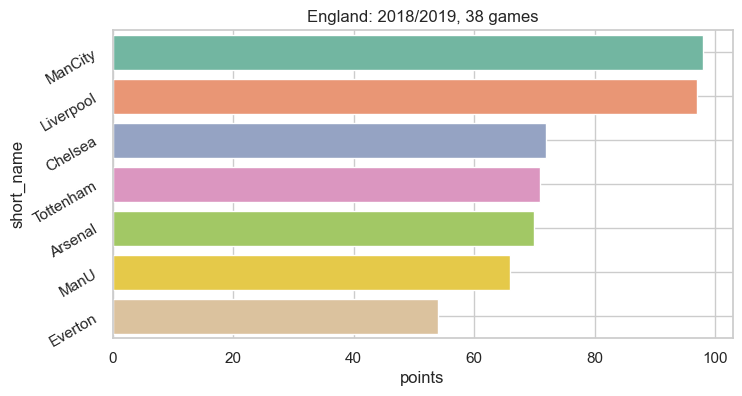

In [39]:
# TODO: Implementation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/england-premier-league-teams-2018-to-2019-stats.csv')

df['team_name'] = df['team_name']
df['common_name'] = df['common_name']
df['season'] = '2018-2019'
df['wins'] = df['wins_home'] + df['wins_away']
df['draws'] = df['matches_played'] - df['wins'] - df['losses']

short_names = {
    'Arsenal': 'Arsenal',
    'Tottenham Hotspur': 'Tottenham',
    'Manchester City': 'ManCity',
    'Manchester United': 'ManU',
    'Chelsea': 'Chelsea',
    'Liverpool': 'Liverpool',
    'Everton': 'Everton'
}

df['short_name'] = df['common_name'].map(short_names)
df['points'] = df['wins'] * 3 + df['draws']

teams = ['Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton']
df_selected = df[df['common_name'].isin(teams)]
df_selected_sorted = df_selected.sort_values(by='points', ascending=False)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(x='points', y='short_name', data=df_selected_sorted, palette="Set2", hue='short_name')
plt.yticks(rotation=30)
plt.grid(True)

season = df['season'].iloc[0]
matches_played = df['matches_played'].sum()
plt.title('England: 2018/2019, 38 games')

plt.show()

## Assignment 05-04. Visualizing Car Data

Load the data into a `DataFrame` from the file: `data/autot.csv`.
Save only those rows in a new `DataFrame` where the car manufacturer (column `Mh`) has more than 50 cars. In the new `DataFrame`, replace the string `'DIESEL'` in column `Ft` with `'Diesel'` and `'PETROL'` with `'Petrol'`. If the string `'NG'` appears in column `Ft`, replace it with `'Natural gas'`.

The result of the visualization is an image similar to the one below, where you utilize the columns of your `DataFrame` for the car fuel type `Ft` and the car manufacturer `Mh`.

**The final result should look like the following image:**

![h5.4](./img/h5_t4.png)

C:\Users\jakac\AppData\Local\Temp\ipykernel_3500\2773227733.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Ft'] = pd.Categorical(df_filtered['Ft'], categories=fuel_order, ordered=True)
C:\Users\jakac\AppData\Local\Temp\ipykernel_3500\2773227733.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby(['Mh', 'Ft']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

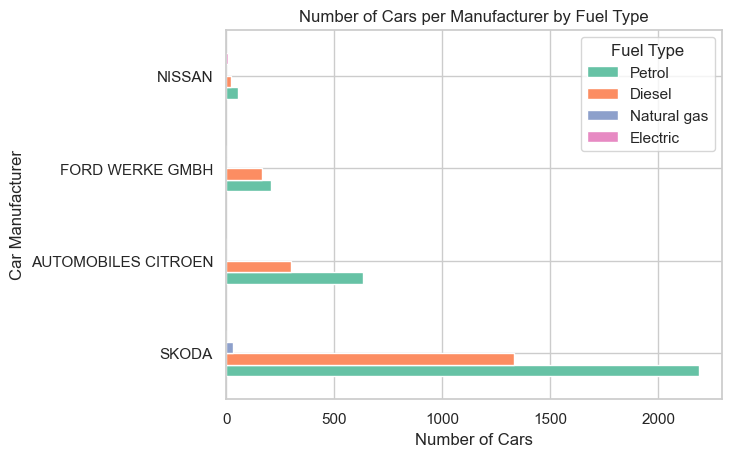

In [50]:
# TODO: Implementation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/autot.csv', delimiter='\t')

car_counts = df['Mh'].value_counts()

popular_manufacturers = car_counts[car_counts > 50].index
df_filtered = df[df['Mh'].isin(popular_manufacturers)]

df_filtered.loc[:, 'Ft'] = df_filtered['Ft'].replace({'DIESEL': 'Diesel', 'PETROL': 'Petrol', 'NG': 'Natural gas', 'Electric': 'Electric'})

fuel_order = ['Petrol', 'Diesel', 'Natural gas', 'Electric']  # Define your desired order
df_filtered['Ft'] = pd.Categorical(df_filtered['Ft'], categories=fuel_order, ordered=True)

# Group by manufacturer and fuel type and count the number of cars
df_grouped = df_filtered.groupby(['Mh', 'Ft']).size().unstack(fill_value=0)

# Sort manufacturers by the total number of cars
df_grouped['total_cars'] = df_grouped.sum(axis=1)
df_grouped_sorted = df_grouped.sort_values('total_cars', ascending=False)

# Drop the 'total_cars' column used for sorting
df_grouped_sorted = df_grouped_sorted.drop(columns='total_cars')

# Sort fuel types in the desired order (if necessary)
df_grouped_sorted = df_grouped_sorted[fuel_order]

# Plotting
plt.figure(figsize=(12, 8))

# Plot horizontal bars next to each other
df_grouped_sorted.plot(kind='barh', stacked=False, color=sns.color_palette("Set2", len(df_grouped_sorted.columns)))

# Adding labels and title
plt.xlabel('Number of Cars')
plt.ylabel('Car Manufacturer')
plt.title('Number of Cars per Manufacturer by Fuel Type')

# Show legend
plt.legend(title='Fuel Type')

# Display the plot
plt.show()


## Assignment 05-05. Visualizing Car Data Part 2

Load the same data as in previous assignment into a `DataFrame` from the file: `data/autot.csv`

The result of the visualization is a _histogram_ similar to the one below, showing the distribution of $CO_2$ emissions (column `Enedc (g/km)`) in 100 different bins and a *cumulative histogram* of $CO_2$ emissions

**The final result should look like the following image:**

![h5.5](./img/h5_t5.png)


In [6]:
# TODO: Implementation